# OOD Detection Pipeline

## 1. Load data to obtain hidden representations.

### Datasets

In [1]:
from constants import JORDAN_DATASET_FILEPATH, MAESTRO_DATASET_FILEPATH
from data.jordan_dataset import JordanDataset
from data.maestro_dataset import MaestroDataset


print("Loading Jordan dataset - train")
id_train_dataset = JordanDataset(
    data_dir=JORDAN_DATASET_FILEPATH,
    split="train"
)
print(f"Obtained {len(id_train_dataset)} training examples from Jordan dataset - train")

print("Loading Jordan dataset - test")
id_test_dataset = JordanDataset(
    data_dir=JORDAN_DATASET_FILEPATH,
    split="validation"
)
print(f"Obtained {len(id_test_dataset)} testing examples from Jordan dataset - test")

print("Loading Maestro dataset - test")
ood_dataset = MaestroDataset(
    data_dir=MAESTRO_DATASET_FILEPATH,
    split="test"
)
print(f"Obtained {len(ood_dataset)} testing examples from Maestro dataset - test")

/data/scratch/joeltjy1/conda_envs/ood-detection/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading Jordan dataset - train
Loading train split from /scratch/joel/jordan_dataset...
Loaded 4060 samples from train split
Sample keys: ['input_ids', 'labels']
Skipped 490 bad samples
Obtained 4060 training examples from Jordan dataset - train
Loading Jordan dataset - test
Loading validation split from /scratch/joel/jordan_dataset...
Loaded 84 samples from validation split
Sample keys: ['input_ids', 'labels']
Skipped 0 bad samples
Obtained 84 testing examples from Jordan dataset - test
Loading Maestro dataset - test
path /scratch/joel/maestrodata/test.txt
Obtained 962 testing examples from Maestro dataset - test


### Model

In [ ]:
from constants.model_constants import DEVICE, JORDAN_MODEL_NAME
import torch
from transformers import AutoModelForCausalLM


model = AutoModelForCausalLM.from_pretrained(
    JORDAN_MODEL_NAME,
    dtype=torch.float32,
).to(DEVICE)

### Extract layers

In [3]:
from extract_layers.pooling_functions import pool_mean_std

batch_size = 8
n_layers = 24
pooling_function = pool_mean_std

layers_to_extract = list(range(n_layers + 1))

### Extract representations: run this only once

In [ ]:
from constants.data_constants import SCRATCH_FILEPATH
from torch.utils.data import DataLoader
from utils.data_loading import collate_fn
from extract_layers.extract_layers_main import extract_representations

for dataset_name, dataset in [("id_train_dataset", id_train_dataset), ("id_test_dataset", id_test_dataset), ("ood_dataset", ood_dataset)]:
    print(f"Creating {dataset_name} dataloader")
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    print(f"Extracting representations from {dataset_name} dataloader")
    save_dir = f"{SCRATCH_FILEPATH}/{dataset_name}"
    extract_representations(
        model,
        dataloader,
        pooling_function=pooling_function,
        save_dir=save_dir,
        layers=layers_to_extract,
    )


Creating id_train_dataset dataloader
Extracting representations from id_train_dataset dataloader
GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(55028, 1024)
    (wpe): Embedding(1024, 1024)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPT2Block(
        (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=3072, nx=1024)
          (c_proj): Conv1D(nf=1024, nx=1024)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=4096, nx=1024)
          (c_proj): Conv1D(nf=1024, nx=4096)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Line

Extracting hidden states:   0%|          | 0/508 [00:00<?, ?it/s]/afs/csail.mit.edu/u/j/joeltjy1/ood-detection/src/utils/data_loading.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  [torch.tensor(ex["input_ids"], dtype=torch.long) for ex in examples]
Extracting hidden states:   0%|          | 1/508 [00:00<07:46,  1.09it/s]

25 torch.Size([8, 766, 1024])
25 torch.Size([8, 766, 1024])


Extracting hidden states:   0%|          | 2/508 [00:01<04:23,  1.92it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   1%|          | 3/508 [00:01<03:19,  2.54it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   1%|          | 4/508 [00:01<02:48,  2.98it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   1%|          | 5/508 [00:01<02:32,  3.30it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   1%|          | 6/508 [00:02<02:22,  3.52it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   1%|▏         | 7/508 [00:02<02:15,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   2%|▏         | 8/508 [00:02<02:10,  3.82it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   2%|▏         | 9/508 [00:02<02:08,  3.89it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   2%|▏         | 10/508 [00:03<02:06,  3.94it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   2%|▏         | 11/508 [00:03<02:04,  3.98it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   2%|▏         | 12/508 [00:03<02:02,  4.04it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   3%|▎         | 13/508 [00:03<02:02,  4.04it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   3%|▎         | 14/508 [00:04<02:02,  4.03it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   3%|▎         | 15/508 [00:04<02:01,  4.05it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   3%|▎         | 16/508 [00:04<02:00,  4.08it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   3%|▎         | 17/508 [00:04<02:00,  4.07it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   4%|▎         | 18/508 [00:05<02:00,  4.05it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   4%|▎         | 19/508 [00:05<02:00,  4.07it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   4%|▍         | 20/508 [00:05<01:59,  4.08it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   4%|▍         | 21/508 [00:05<02:00,  4.06it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   4%|▍         | 22/508 [00:06<01:59,  4.06it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   5%|▍         | 23/508 [00:06<01:58,  4.09it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   5%|▍         | 24/508 [00:06<01:58,  4.07it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   5%|▍         | 25/508 [00:06<01:59,  4.05it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   5%|▌         | 26/508 [00:07<01:58,  4.07it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   5%|▌         | 27/508 [00:07<01:58,  4.05it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   6%|▌         | 28/508 [00:07<01:58,  4.05it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   6%|▌         | 29/508 [00:07<01:57,  4.07it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   6%|▌         | 30/508 [00:08<01:57,  4.06it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   6%|▌         | 31/508 [00:08<01:57,  4.05it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   6%|▋         | 32/508 [00:08<01:57,  4.07it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   6%|▋         | 33/508 [00:08<01:57,  4.04it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   7%|▋         | 34/508 [00:09<01:57,  4.05it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   7%|▋         | 35/508 [00:09<01:57,  4.04it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   7%|▋         | 36/508 [00:09<01:57,  4.03it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   7%|▋         | 37/508 [00:09<01:56,  4.05it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   7%|▋         | 38/508 [00:10<01:56,  4.04it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   8%|▊         | 39/508 [00:10<01:56,  4.04it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   8%|▊         | 40/508 [00:10<01:55,  4.05it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   8%|▊         | 41/508 [00:10<01:55,  4.05it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   8%|▊         | 42/508 [00:11<01:55,  4.04it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   8%|▊         | 43/508 [00:11<01:55,  4.04it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   9%|▊         | 44/508 [00:11<01:55,  4.03it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   9%|▉         | 45/508 [00:11<01:54,  4.05it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   9%|▉         | 46/508 [00:11<01:54,  4.05it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   9%|▉         | 47/508 [00:12<01:54,  4.03it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   9%|▉         | 48/508 [00:12<01:53,  4.05it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  10%|▉         | 49/508 [00:12<01:53,  4.03it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  10%|▉         | 50/508 [00:12<01:53,  4.04it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  10%|█         | 51/508 [00:13<01:53,  4.03it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  10%|█         | 52/508 [00:13<01:53,  4.03it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  10%|█         | 53/508 [00:13<01:52,  4.03it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  11%|█         | 54/508 [00:13<01:53,  4.01it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  11%|█         | 55/508 [00:14<01:52,  4.02it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  11%|█         | 56/508 [00:14<01:52,  4.01it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  11%|█         | 57/508 [00:14<01:52,  4.03it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  11%|█▏        | 58/508 [00:14<01:52,  4.01it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  12%|█▏        | 59/508 [00:15<01:51,  4.02it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  12%|█▏        | 60/508 [00:15<01:51,  4.00it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  12%|█▏        | 61/508 [00:15<01:51,  4.02it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  12%|█▏        | 62/508 [00:15<01:51,  4.01it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  12%|█▏        | 63/508 [00:16<01:50,  4.01it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  13%|█▎        | 64/508 [00:16<01:51,  4.00it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  13%|█▎        | 65/508 [00:16<01:50,  4.01it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  13%|█▎        | 66/508 [00:16<01:50,  4.00it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  13%|█▎        | 67/508 [00:17<01:50,  4.00it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  13%|█▎        | 68/508 [00:17<01:50,  3.99it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  14%|█▎        | 69/508 [00:17<01:49,  4.00it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  14%|█▍        | 70/508 [00:17<01:49,  3.99it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  14%|█▍        | 71/508 [00:18<01:49,  4.01it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  14%|█▍        | 72/508 [00:18<01:49,  3.99it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  14%|█▍        | 73/508 [00:18<01:48,  4.01it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  15%|█▍        | 74/508 [00:18<01:48,  3.99it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  15%|█▍        | 75/508 [00:19<01:48,  4.00it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  15%|█▍        | 76/508 [00:19<01:48,  4.00it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  15%|█▌        | 77/508 [00:19<01:47,  4.01it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  15%|█▌        | 78/508 [00:19<01:47,  3.98it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  16%|█▌        | 79/508 [00:20<01:47,  3.98it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  16%|█▌        | 80/508 [00:20<01:47,  3.97it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  16%|█▌        | 81/508 [00:20<01:47,  3.97it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  16%|█▌        | 82/508 [00:20<01:46,  3.99it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  16%|█▋        | 83/508 [00:21<01:46,  3.98it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  17%|█▋        | 84/508 [00:21<01:46,  3.99it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  17%|█▋        | 85/508 [00:21<01:46,  3.97it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  17%|█▋        | 86/508 [00:21<01:46,  3.98it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  17%|█▋        | 87/508 [00:22<01:45,  3.98it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  17%|█▋        | 88/508 [00:22<01:45,  3.99it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  18%|█▊        | 89/508 [00:22<01:45,  3.98it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  18%|█▊        | 90/508 [00:22<01:45,  3.98it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  18%|█▊        | 91/508 [00:23<01:44,  3.98it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  18%|█▊        | 92/508 [00:23<01:44,  3.97it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  18%|█▊        | 93/508 [00:23<01:44,  3.98it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  19%|█▊        | 94/508 [00:24<01:44,  3.97it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  19%|█▊        | 95/508 [00:24<01:44,  3.97it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  19%|█▉        | 96/508 [00:24<01:43,  3.98it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  19%|█▉        | 97/508 [00:24<01:43,  3.97it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  19%|█▉        | 98/508 [00:25<01:43,  3.98it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  19%|█▉        | 99/508 [00:25<01:43,  3.96it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  20%|█▉        | 100/508 [00:25<01:43,  3.95it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  20%|█▉        | 101/508 [00:25<01:42,  3.97it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  20%|██        | 102/508 [00:26<01:42,  3.97it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  20%|██        | 103/508 [00:26<01:43,  3.91it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  20%|██        | 104/508 [00:26<01:42,  3.93it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  21%|██        | 105/508 [00:26<01:42,  3.94it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  21%|██        | 106/508 [00:27<01:42,  3.94it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  21%|██        | 107/508 [00:27<01:41,  3.94it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  21%|██▏       | 108/508 [00:27<01:41,  3.94it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  21%|██▏       | 109/508 [00:27<01:41,  3.94it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  22%|██▏       | 110/508 [00:28<01:40,  3.98it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  22%|██▏       | 111/508 [00:28<01:40,  3.96it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  22%|██▏       | 112/508 [00:28<01:40,  3.94it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  22%|██▏       | 113/508 [00:28<01:40,  3.94it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  22%|██▏       | 114/508 [00:29<01:39,  3.95it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  23%|██▎       | 115/508 [00:29<01:39,  3.97it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  23%|██▎       | 116/508 [00:29<01:39,  3.95it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  23%|██▎       | 117/508 [00:29<01:39,  3.94it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  23%|██▎       | 118/508 [00:30<01:39,  3.93it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  23%|██▎       | 119/508 [00:30<01:38,  3.93it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  24%|██▎       | 120/508 [00:30<01:38,  3.95it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  24%|██▍       | 121/508 [00:30<01:38,  3.93it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  24%|██▍       | 122/508 [00:31<01:38,  3.93it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  24%|██▍       | 123/508 [00:31<01:38,  3.93it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  24%|██▍       | 124/508 [00:31<01:37,  3.93it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  25%|██▍       | 125/508 [00:31<01:37,  3.93it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  25%|██▍       | 126/508 [00:32<01:37,  3.92it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  25%|██▌       | 127/508 [00:32<01:37,  3.92it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  25%|██▌       | 128/508 [00:32<01:36,  3.92it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  25%|██▌       | 129/508 [00:32<01:36,  3.92it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  26%|██▌       | 130/508 [00:33<01:36,  3.91it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  26%|██▌       | 131/508 [00:33<01:36,  3.91it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  26%|██▌       | 132/508 [00:33<01:35,  3.92it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  26%|██▌       | 133/508 [00:33<01:35,  3.91it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  26%|██▋       | 134/508 [00:34<01:35,  3.90it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  27%|██▋       | 135/508 [00:34<01:35,  3.90it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  27%|██▋       | 136/508 [00:34<01:35,  3.90it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  27%|██▋       | 137/508 [00:34<01:35,  3.90it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  27%|██▋       | 138/508 [00:35<01:34,  3.89it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  27%|██▋       | 139/508 [00:35<01:34,  3.90it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  28%|██▊       | 140/508 [00:35<01:34,  3.91it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  28%|██▊       | 141/508 [00:35<01:33,  3.90it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  28%|██▊       | 142/508 [00:36<01:36,  3.79it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  28%|██▊       | 143/508 [00:36<01:35,  3.83it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  28%|██▊       | 144/508 [00:36<01:34,  3.86it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  29%|██▊       | 145/508 [00:37<01:33,  3.87it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  29%|██▊       | 146/508 [00:37<01:33,  3.86it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  29%|██▉       | 147/508 [00:37<01:33,  3.87it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  29%|██▉       | 148/508 [00:37<01:32,  3.87it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  29%|██▉       | 149/508 [00:38<01:32,  3.88it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  30%|██▉       | 150/508 [00:38<01:32,  3.88it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  30%|██▉       | 151/508 [00:38<01:31,  3.88it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  30%|██▉       | 152/508 [00:38<01:31,  3.87it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  30%|███       | 153/508 [00:39<01:31,  3.89it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  30%|███       | 154/508 [00:39<01:30,  3.90it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  31%|███       | 155/508 [00:39<01:30,  3.88it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  31%|███       | 156/508 [00:39<01:30,  3.87it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  31%|███       | 157/508 [00:40<01:30,  3.88it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  31%|███       | 158/508 [00:40<01:30,  3.88it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  31%|███▏      | 159/508 [00:40<01:30,  3.87it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  31%|███▏      | 160/508 [00:40<01:29,  3.87it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  32%|███▏      | 161/508 [00:41<01:29,  3.87it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  32%|███▏      | 162/508 [00:41<01:29,  3.87it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  32%|███▏      | 163/508 [00:41<01:29,  3.86it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  32%|███▏      | 164/508 [00:41<01:29,  3.86it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  32%|███▏      | 165/508 [00:42<01:28,  3.86it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  33%|███▎      | 166/508 [00:42<01:28,  3.87it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  33%|███▎      | 167/508 [00:42<01:28,  3.86it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  33%|███▎      | 168/508 [00:42<01:28,  3.85it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  33%|███▎      | 169/508 [00:43<01:27,  3.85it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  33%|███▎      | 170/508 [00:43<01:27,  3.84it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  34%|███▎      | 171/508 [00:43<01:27,  3.85it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  34%|███▍      | 172/508 [00:43<01:27,  3.84it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  34%|███▍      | 173/508 [00:44<01:26,  3.86it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  34%|███▍      | 174/508 [00:44<01:26,  3.87it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  34%|███▍      | 175/508 [00:44<01:28,  3.78it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  35%|███▍      | 176/508 [00:45<01:27,  3.79it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  35%|███▍      | 177/508 [00:45<01:27,  3.80it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  35%|███▌      | 178/508 [00:45<01:26,  3.81it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  35%|███▌      | 179/508 [00:45<01:26,  3.82it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  35%|███▌      | 180/508 [00:46<01:25,  3.82it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  36%|███▌      | 181/508 [00:46<01:25,  3.84it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  36%|███▌      | 182/508 [00:46<01:24,  3.85it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  36%|███▌      | 183/508 [00:46<01:26,  3.77it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  36%|███▌      | 184/508 [00:47<01:25,  3.79it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  36%|███▋      | 185/508 [00:47<01:25,  3.80it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  37%|███▋      | 186/508 [00:47<01:24,  3.80it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  37%|███▋      | 187/508 [00:47<01:24,  3.81it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  37%|███▋      | 188/508 [00:48<01:23,  3.81it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  37%|███▋      | 189/508 [00:48<01:23,  3.84it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  37%|███▋      | 190/508 [00:48<01:23,  3.83it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  38%|███▊      | 191/508 [00:48<01:23,  3.78it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  38%|███▊      | 192/508 [00:49<01:23,  3.79it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  38%|███▊      | 193/508 [00:49<01:23,  3.79it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  38%|███▊      | 194/508 [00:49<01:22,  3.80it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  38%|███▊      | 195/508 [00:50<01:22,  3.78it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  39%|███▊      | 196/508 [00:50<01:22,  3.79it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  39%|███▉      | 197/508 [00:50<01:21,  3.80it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  39%|███▉      | 198/508 [00:50<01:21,  3.80it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  39%|███▉      | 199/508 [00:51<01:21,  3.79it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  39%|███▉      | 200/508 [00:51<01:20,  3.81it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  40%|███▉      | 201/508 [00:51<01:20,  3.81it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  40%|███▉      | 202/508 [00:51<01:20,  3.81it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  40%|███▉      | 203/508 [00:52<01:19,  3.82it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  40%|████      | 204/508 [00:52<01:19,  3.81it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  40%|████      | 205/508 [00:52<01:19,  3.80it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  41%|████      | 206/508 [00:52<01:19,  3.81it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  41%|████      | 207/508 [00:53<01:19,  3.80it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  41%|████      | 208/508 [00:53<01:18,  3.80it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  41%|████      | 209/508 [00:53<01:18,  3.80it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  41%|████▏     | 210/508 [00:53<01:18,  3.80it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  42%|████▏     | 211/508 [00:54<01:18,  3.80it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  42%|████▏     | 212/508 [00:54<01:17,  3.80it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  42%|████▏     | 213/508 [00:54<01:17,  3.79it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  42%|████▏     | 214/508 [00:55<01:17,  3.80it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  42%|████▏     | 215/508 [00:55<01:17,  3.80it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  43%|████▎     | 216/508 [00:55<01:16,  3.80it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  43%|████▎     | 217/508 [00:55<01:17,  3.77it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  43%|████▎     | 218/508 [00:56<01:16,  3.79it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  43%|████▎     | 219/508 [00:56<01:16,  3.80it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  43%|████▎     | 220/508 [00:56<01:15,  3.80it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  44%|████▎     | 221/508 [00:56<01:15,  3.79it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  44%|████▎     | 222/508 [00:57<01:15,  3.78it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  44%|████▍     | 223/508 [00:57<01:15,  3.79it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  44%|████▍     | 224/508 [00:57<01:14,  3.79it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  44%|████▍     | 225/508 [00:57<01:14,  3.79it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  44%|████▍     | 226/508 [00:58<01:14,  3.77it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  45%|████▍     | 227/508 [00:58<01:14,  3.78it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  45%|████▍     | 228/508 [00:58<01:13,  3.79it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  45%|████▌     | 229/508 [00:58<01:13,  3.79it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  45%|████▌     | 230/508 [00:59<01:13,  3.78it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  45%|████▌     | 231/508 [00:59<01:13,  3.77it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  46%|████▌     | 232/508 [00:59<01:12,  3.79it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  46%|████▌     | 233/508 [01:00<01:12,  3.79it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  46%|████▌     | 234/508 [01:00<01:12,  3.79it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  46%|████▋     | 235/508 [01:00<01:12,  3.77it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  46%|████▋     | 236/508 [01:00<01:12,  3.77it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  47%|████▋     | 237/508 [01:01<01:11,  3.78it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  47%|████▋     | 238/508 [01:01<01:11,  3.78it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  47%|████▋     | 239/508 [01:01<01:11,  3.76it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  47%|████▋     | 240/508 [01:01<01:11,  3.77it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  47%|████▋     | 241/508 [01:02<01:10,  3.78it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  48%|████▊     | 242/508 [01:02<01:10,  3.76it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  48%|████▊     | 243/508 [01:02<01:10,  3.75it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  48%|████▊     | 244/508 [01:02<01:10,  3.77it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  48%|████▊     | 245/508 [01:03<01:09,  3.76it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  48%|████▊     | 246/508 [01:03<01:09,  3.75it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  49%|████▊     | 247/508 [01:03<01:09,  3.76it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  49%|████▉     | 248/508 [01:04<01:08,  3.77it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  49%|████▉     | 249/508 [01:04<01:09,  3.75it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  49%|████▉     | 250/508 [01:04<01:08,  3.76it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  49%|████▉     | 251/508 [01:04<01:08,  3.77it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  50%|████▉     | 252/508 [01:05<01:07,  3.77it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  50%|████▉     | 253/508 [01:05<01:07,  3.75it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  50%|█████     | 254/508 [01:05<01:07,  3.77it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  50%|█████     | 255/508 [01:05<01:07,  3.78it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  50%|█████     | 256/508 [01:06<01:07,  3.74it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  51%|█████     | 257/508 [01:06<01:06,  3.76it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  51%|█████     | 258/508 [01:06<01:06,  3.77it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  51%|█████     | 259/508 [01:06<01:06,  3.75it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  51%|█████     | 260/508 [01:07<01:06,  3.75it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  51%|█████▏    | 261/508 [01:07<01:05,  3.77it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  52%|█████▏    | 262/508 [01:07<01:05,  3.77it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  52%|█████▏    | 263/508 [01:08<01:05,  3.74it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  52%|█████▏    | 264/508 [01:08<01:04,  3.76it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  52%|█████▏    | 265/508 [01:08<01:05,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  52%|█████▏    | 266/508 [01:08<01:04,  3.75it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  53%|█████▎    | 267/508 [01:09<01:04,  3.76it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  53%|█████▎    | 268/508 [01:09<01:04,  3.74it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  53%|█████▎    | 269/508 [01:09<01:03,  3.74it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  53%|█████▎    | 270/508 [01:09<01:04,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  53%|█████▎    | 271/508 [01:10<01:04,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  54%|█████▎    | 272/508 [01:10<01:03,  3.71it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  54%|█████▎    | 273/508 [01:10<01:03,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  54%|█████▍    | 274/508 [01:10<01:02,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  54%|█████▍    | 275/508 [01:11<01:02,  3.74it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  54%|█████▍    | 276/508 [01:11<01:01,  3.75it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  55%|█████▍    | 277/508 [01:11<01:02,  3.72it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  55%|█████▍    | 278/508 [01:12<01:01,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  55%|█████▍    | 279/508 [01:12<01:01,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  55%|█████▌    | 280/508 [01:12<01:01,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  55%|█████▌    | 281/508 [01:12<01:00,  3.75it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  56%|█████▌    | 282/508 [01:13<01:01,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  56%|█████▌    | 283/508 [01:13<01:00,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  56%|█████▌    | 284/508 [01:13<01:00,  3.72it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  56%|█████▌    | 285/508 [01:13<00:59,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  56%|█████▋    | 286/508 [01:14<00:59,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  56%|█████▋    | 287/508 [01:14<00:59,  3.74it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  57%|█████▋    | 288/508 [01:14<00:58,  3.75it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  57%|█████▋    | 289/508 [01:15<00:58,  3.72it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  57%|█████▋    | 290/508 [01:15<00:58,  3.74it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  57%|█████▋    | 291/508 [01:15<00:58,  3.74it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  57%|█████▋    | 292/508 [01:15<00:57,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  58%|█████▊    | 293/508 [01:16<00:57,  3.74it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  58%|█████▊    | 294/508 [01:16<00:57,  3.72it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  58%|█████▊    | 295/508 [01:16<00:56,  3.74it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  58%|█████▊    | 296/508 [01:16<00:56,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  58%|█████▊    | 297/508 [01:17<00:56,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  59%|█████▊    | 298/508 [01:17<00:56,  3.74it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  59%|█████▉    | 299/508 [01:17<00:55,  3.74it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  59%|█████▉    | 300/508 [01:17<00:55,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  59%|█████▉    | 301/508 [01:18<00:55,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  59%|█████▉    | 302/508 [01:18<00:55,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  60%|█████▉    | 303/508 [01:18<00:54,  3.74it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  60%|█████▉    | 304/508 [01:19<00:54,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  60%|██████    | 305/508 [01:19<00:54,  3.74it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  60%|██████    | 306/508 [01:19<00:54,  3.72it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  60%|██████    | 307/508 [01:19<00:53,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  61%|██████    | 308/508 [01:20<00:53,  3.74it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  61%|██████    | 309/508 [01:20<00:53,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  61%|██████    | 310/508 [01:20<00:52,  3.74it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  61%|██████    | 311/508 [01:20<00:52,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  61%|██████▏   | 312/508 [01:21<00:52,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  62%|██████▏   | 313/508 [01:21<00:52,  3.74it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  62%|██████▏   | 314/508 [01:21<00:52,  3.72it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  62%|██████▏   | 315/508 [01:21<00:51,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  62%|██████▏   | 316/508 [01:22<00:51,  3.72it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  62%|██████▏   | 317/508 [01:22<00:51,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  63%|██████▎   | 318/508 [01:22<00:50,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  63%|██████▎   | 319/508 [01:23<00:50,  3.72it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  63%|██████▎   | 320/508 [01:23<00:50,  3.74it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  63%|██████▎   | 321/508 [01:23<00:50,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  63%|██████▎   | 322/508 [01:23<00:49,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  64%|██████▎   | 323/508 [01:24<00:49,  3.71it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  64%|██████▍   | 324/508 [01:24<00:49,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  64%|██████▍   | 325/508 [01:24<00:49,  3.72it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  64%|██████▍   | 326/508 [01:24<00:48,  3.72it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  64%|██████▍   | 327/508 [01:25<00:48,  3.72it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  65%|██████▍   | 328/508 [01:25<00:48,  3.71it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  65%|██████▍   | 329/508 [01:25<00:47,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  65%|██████▍   | 330/508 [01:25<00:47,  3.71it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  65%|██████▌   | 331/508 [01:26<00:47,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  65%|██████▌   | 332/508 [01:26<00:47,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  66%|██████▌   | 333/508 [01:26<00:46,  3.72it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  66%|██████▌   | 334/508 [01:27<00:46,  3.71it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  66%|██████▌   | 335/508 [01:27<00:46,  3.72it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  66%|██████▌   | 336/508 [01:27<00:46,  3.71it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  66%|██████▋   | 337/508 [01:27<00:46,  3.71it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  67%|██████▋   | 338/508 [01:28<00:45,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  67%|██████▋   | 339/508 [01:28<00:45,  3.71it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  67%|██████▋   | 340/508 [01:28<00:45,  3.71it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  67%|██████▋   | 341/508 [01:28<00:45,  3.71it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  67%|██████▋   | 342/508 [01:29<00:44,  3.72it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  68%|██████▊   | 343/508 [01:29<00:44,  3.71it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  68%|██████▊   | 344/508 [01:29<00:44,  3.72it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  68%|██████▊   | 345/508 [01:30<00:43,  3.71it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  68%|██████▊   | 346/508 [01:30<00:43,  3.72it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  68%|██████▊   | 347/508 [01:30<00:43,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  69%|██████▊   | 348/508 [01:30<00:43,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  69%|██████▊   | 349/508 [01:31<00:42,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  69%|██████▉   | 350/508 [01:31<00:42,  3.71it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  69%|██████▉   | 351/508 [01:31<00:42,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  69%|██████▉   | 352/508 [01:31<00:42,  3.71it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  69%|██████▉   | 353/508 [01:32<00:41,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  70%|██████▉   | 354/508 [01:32<00:41,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  70%|██████▉   | 355/508 [01:32<00:41,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  70%|███████   | 356/508 [01:33<00:41,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  70%|███████   | 357/508 [01:33<00:40,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  70%|███████   | 358/508 [01:33<00:40,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  71%|███████   | 359/508 [01:33<00:40,  3.71it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  71%|███████   | 360/508 [01:34<00:40,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  71%|███████   | 361/508 [01:34<00:39,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  71%|███████▏  | 362/508 [01:34<00:39,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  71%|███████▏  | 363/508 [01:34<00:39,  3.71it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  72%|███████▏  | 364/508 [01:35<00:39,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  72%|███████▏  | 365/508 [01:35<00:38,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  72%|███████▏  | 366/508 [01:35<00:38,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  72%|███████▏  | 367/508 [01:35<00:38,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  72%|███████▏  | 368/508 [01:36<00:37,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  73%|███████▎  | 369/508 [01:36<00:37,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  73%|███████▎  | 370/508 [01:36<00:37,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  73%|███████▎  | 371/508 [01:37<00:37,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  73%|███████▎  | 372/508 [01:37<00:36,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  73%|███████▎  | 373/508 [01:37<00:36,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  74%|███████▎  | 374/508 [01:37<00:36,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  74%|███████▍  | 375/508 [01:38<00:36,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  74%|███████▍  | 376/508 [01:38<00:35,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  74%|███████▍  | 377/508 [01:38<00:35,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  74%|███████▍  | 378/508 [01:38<00:35,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  75%|███████▍  | 379/508 [01:39<00:34,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  75%|███████▍  | 380/508 [01:39<00:34,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  75%|███████▌  | 381/508 [01:39<00:34,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  75%|███████▌  | 382/508 [01:40<00:34,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  75%|███████▌  | 383/508 [01:40<00:33,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  76%|███████▌  | 384/508 [01:40<00:33,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  76%|███████▌  | 385/508 [01:40<00:33,  3.71it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  76%|███████▌  | 386/508 [01:41<00:33,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  76%|███████▌  | 387/508 [01:41<00:32,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  76%|███████▋  | 388/508 [01:41<00:32,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  77%|███████▋  | 389/508 [01:41<00:32,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  77%|███████▋  | 390/508 [01:42<00:31,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  77%|███████▋  | 391/508 [01:42<00:31,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  77%|███████▋  | 392/508 [01:42<00:31,  3.70it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  77%|███████▋  | 393/508 [01:43<00:31,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  78%|███████▊  | 394/508 [01:43<00:30,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  78%|███████▊  | 395/508 [01:43<00:30,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  78%|███████▊  | 396/508 [01:43<00:30,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  78%|███████▊  | 397/508 [01:44<00:30,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  78%|███████▊  | 398/508 [01:44<00:29,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  79%|███████▊  | 399/508 [01:44<00:29,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  79%|███████▊  | 400/508 [01:44<00:29,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  79%|███████▉  | 401/508 [01:45<00:29,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  79%|███████▉  | 402/508 [01:45<00:28,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  79%|███████▉  | 403/508 [01:45<00:28,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  80%|███████▉  | 404/508 [01:46<00:28,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  80%|███████▉  | 405/508 [01:46<00:28,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  80%|███████▉  | 406/508 [01:46<00:27,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  80%|████████  | 407/508 [01:46<00:27,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  80%|████████  | 408/508 [01:47<00:27,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  81%|████████  | 409/508 [01:47<00:26,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  81%|████████  | 410/508 [01:47<00:26,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  81%|████████  | 411/508 [01:47<00:26,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  81%|████████  | 412/508 [01:48<00:26,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  81%|████████▏ | 413/508 [01:48<00:25,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  81%|████████▏ | 414/508 [01:48<00:25,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  82%|████████▏ | 415/508 [01:49<00:25,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  82%|████████▏ | 416/508 [01:49<00:25,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  82%|████████▏ | 417/508 [01:49<00:24,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  82%|████████▏ | 418/508 [01:49<00:24,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  82%|████████▏ | 419/508 [01:50<00:24,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  83%|████████▎ | 420/508 [01:50<00:23,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  83%|████████▎ | 421/508 [01:50<00:23,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  83%|████████▎ | 422/508 [01:50<00:23,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  83%|████████▎ | 423/508 [01:51<00:23,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  83%|████████▎ | 424/508 [01:51<00:22,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  84%|████████▎ | 425/508 [01:51<00:22,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  84%|████████▍ | 426/508 [01:52<00:22,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  84%|████████▍ | 427/508 [01:52<00:21,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  84%|████████▍ | 428/508 [01:52<00:21,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  84%|████████▍ | 429/508 [01:52<00:21,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  85%|████████▍ | 430/508 [01:53<00:21,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  85%|████████▍ | 431/508 [01:53<00:20,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  85%|████████▌ | 432/508 [01:53<00:20,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  85%|████████▌ | 433/508 [01:53<00:20,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  85%|████████▌ | 434/508 [01:54<00:20,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  86%|████████▌ | 435/508 [01:54<00:19,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  86%|████████▌ | 436/508 [01:54<00:19,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  86%|████████▌ | 437/508 [01:54<00:19,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  86%|████████▌ | 438/508 [01:55<00:19,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  86%|████████▋ | 439/508 [01:55<00:18,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  87%|████████▋ | 440/508 [01:55<00:18,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  87%|████████▋ | 441/508 [01:56<00:18,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  87%|████████▋ | 442/508 [01:56<00:17,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  87%|████████▋ | 443/508 [01:56<00:17,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  87%|████████▋ | 444/508 [01:56<00:17,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  88%|████████▊ | 445/508 [01:57<00:17,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  88%|████████▊ | 446/508 [01:57<00:16,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  88%|████████▊ | 447/508 [01:57<00:16,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  88%|████████▊ | 448/508 [01:57<00:16,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  88%|████████▊ | 449/508 [01:58<00:16,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  89%|████████▊ | 450/508 [01:58<00:15,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  89%|████████▉ | 451/508 [01:58<00:15,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  89%|████████▉ | 452/508 [01:59<00:15,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  89%|████████▉ | 453/508 [01:59<00:14,  3.68it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  89%|████████▉ | 454/508 [01:59<00:14,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  90%|████████▉ | 455/508 [01:59<00:14,  3.65it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  90%|████████▉ | 456/508 [02:00<00:14,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  90%|████████▉ | 457/508 [02:00<00:13,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  90%|█████████ | 458/508 [02:00<00:13,  3.65it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  90%|█████████ | 459/508 [02:00<00:13,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  91%|█████████ | 460/508 [02:01<00:13,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  91%|█████████ | 461/508 [02:01<00:12,  3.65it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  91%|█████████ | 462/508 [02:01<00:12,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  91%|█████████ | 463/508 [02:02<00:12,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  91%|█████████▏| 464/508 [02:02<00:12,  3.65it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  92%|█████████▏| 465/508 [02:02<00:11,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  92%|█████████▏| 466/508 [02:02<00:11,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  92%|█████████▏| 467/508 [02:03<00:11,  3.65it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  92%|█████████▏| 468/508 [02:03<00:10,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  92%|█████████▏| 469/508 [02:03<00:10,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  93%|█████████▎| 470/508 [02:04<00:10,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  93%|█████████▎| 471/508 [02:04<00:10,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  93%|█████████▎| 472/508 [02:04<00:09,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  93%|█████████▎| 473/508 [02:04<00:09,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  93%|█████████▎| 474/508 [02:05<00:09,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  94%|█████████▎| 475/508 [02:05<00:09,  3.65it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  94%|█████████▎| 476/508 [02:05<00:08,  3.64it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  94%|█████████▍| 477/508 [02:05<00:08,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  94%|█████████▍| 478/508 [02:06<00:08,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  94%|█████████▍| 479/508 [02:06<00:07,  3.65it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  94%|█████████▍| 480/508 [02:06<00:07,  3.65it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  95%|█████████▍| 481/508 [02:07<00:07,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  95%|█████████▍| 482/508 [02:07<00:07,  3.65it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  95%|█████████▌| 483/508 [02:07<00:06,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  95%|█████████▌| 484/508 [02:07<00:06,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  95%|█████████▌| 485/508 [02:08<00:06,  3.65it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  96%|█████████▌| 486/508 [02:08<00:06,  3.65it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  96%|█████████▌| 487/508 [02:08<00:05,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  96%|█████████▌| 488/508 [02:08<00:05,  3.65it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  96%|█████████▋| 489/508 [02:09<00:05,  3.65it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  96%|█████████▋| 490/508 [02:09<00:04,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  97%|█████████▋| 491/508 [02:09<00:04,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  97%|█████████▋| 492/508 [02:10<00:04,  3.65it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  97%|█████████▋| 493/508 [02:10<00:04,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  97%|█████████▋| 494/508 [02:10<00:03,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  97%|█████████▋| 495/508 [02:10<00:03,  3.64it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  98%|█████████▊| 496/508 [02:11<00:03,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  98%|█████████▊| 497/508 [02:11<00:03,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  98%|█████████▊| 498/508 [02:11<00:02,  3.65it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  98%|█████████▊| 499/508 [02:11<00:02,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  98%|█████████▊| 500/508 [02:12<00:02,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  99%|█████████▊| 501/508 [02:12<00:01,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  99%|█████████▉| 502/508 [02:12<00:01,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  99%|█████████▉| 503/508 [02:13<00:01,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  99%|█████████▉| 504/508 [02:13<00:01,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  99%|█████████▉| 505/508 [02:13<00:00,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states: 100%|█████████▉| 506/508 [02:13<00:00,  3.65it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states: 100%|██████████| 508/508 [02:14<00:00,  3.78it/s]


25 torch.Size([4, 766, 1024])
Saved layer 0: (4060, 2048)
Saved layer 1: (4060, 2048)
Saved layer 2: (4060, 2048)
Saved layer 3: (4060, 2048)
Saved layer 4: (4060, 2048)
Saved layer 5: (4060, 2048)
Saved layer 6: (4060, 2048)
Saved layer 7: (4060, 2048)
Saved layer 8: (4060, 2048)
Saved layer 9: (4060, 2048)
Saved layer 10: (4060, 2048)
Saved layer 11: (4060, 2048)
Saved layer 12: (4060, 2048)
Saved layer 13: (4060, 2048)
Saved layer 14: (4060, 2048)
Saved layer 15: (4060, 2048)
Saved layer 16: (4060, 2048)
Saved layer 17: (4060, 2048)
Saved layer 18: (4060, 2048)
Saved layer 19: (4060, 2048)
Saved layer 20: (4060, 2048)
Saved layer 21: (4060, 2048)
Saved layer 22: (4060, 2048)
Saved layer 23: (4060, 2048)
Saved layer 24: (4060, 2048)
Creating id_test_dataset dataloader
Extracting representations from id_test_dataset dataloader
GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(55028, 1024)
    (wpe): Embedding(1024, 1024)
    (drop): Dropout(p=0.1, inplace=False)
    (h

Extracting hidden states:   0%|          | 0/11 [00:00<?, ?it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:   9%|▉         | 1/11 [00:00<00:02,  4.04it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  18%|█▊        | 2/11 [00:00<00:02,  3.84it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  27%|██▋       | 3/11 [00:00<00:02,  3.77it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  36%|███▋      | 4/11 [00:01<00:01,  3.73it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  45%|████▌     | 5/11 [00:01<00:01,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  55%|█████▍    | 6/11 [00:01<00:01,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  64%|██████▎   | 7/11 [00:01<00:01,  3.69it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  73%|███████▎  | 8/11 [00:02<00:00,  3.67it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states:  82%|████████▏ | 9/11 [00:02<00:00,  3.66it/s]

25 torch.Size([8, 766, 1024])


Extracting hidden states: 100%|██████████| 11/11 [00:02<00:00,  3.88it/s]


25 torch.Size([4, 766, 1024])
Saved layer 0: (84, 2048)
Saved layer 1: (84, 2048)
Saved layer 2: (84, 2048)
Saved layer 3: (84, 2048)
Saved layer 4: (84, 2048)
Saved layer 5: (84, 2048)
Saved layer 6: (84, 2048)
Saved layer 7: (84, 2048)
Saved layer 8: (84, 2048)
Saved layer 9: (84, 2048)
Saved layer 10: (84, 2048)
Saved layer 11: (84, 2048)
Saved layer 12: (84, 2048)
Saved layer 13: (84, 2048)
Saved layer 14: (84, 2048)
Saved layer 15: (84, 2048)
Saved layer 16: (84, 2048)
Saved layer 17: (84, 2048)
Saved layer 18: (84, 2048)
Saved layer 19: (84, 2048)
Saved layer 20: (84, 2048)
Saved layer 21: (84, 2048)
Saved layer 22: (84, 2048)
Saved layer 23: (84, 2048)
Saved layer 24: (84, 2048)
Creating ood_dataset dataloader
Extracting representations from ood_dataset dataloader
GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(55028, 1024)
    (wpe): Embedding(1024, 1024)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPT2Block(
        (ln_1

Extracting hidden states:   0%|          | 0/121 [00:00<?, ?it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:   1%|          | 1/121 [00:00<00:39,  3.00it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:   2%|▏         | 2/121 [00:00<00:40,  2.92it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:   2%|▏         | 3/121 [00:01<00:41,  2.86it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:   3%|▎         | 4/121 [00:01<00:41,  2.84it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:   4%|▍         | 5/121 [00:01<00:40,  2.83it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:   5%|▍         | 6/121 [00:02<00:40,  2.83it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:   6%|▌         | 7/121 [00:02<00:40,  2.83it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:   7%|▋         | 8/121 [00:02<00:40,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:   7%|▋         | 9/121 [00:03<00:39,  2.83it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:   8%|▊         | 10/121 [00:03<00:39,  2.83it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:   9%|▉         | 11/121 [00:03<00:38,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  10%|▉         | 12/121 [00:04<00:38,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  11%|█         | 13/121 [00:04<00:38,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  12%|█▏        | 14/121 [00:04<00:37,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  12%|█▏        | 15/121 [00:05<00:37,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  13%|█▎        | 16/121 [00:05<00:37,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  14%|█▍        | 17/121 [00:06<00:36,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  15%|█▍        | 18/121 [00:06<00:36,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  16%|█▌        | 19/121 [00:06<00:36,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  17%|█▋        | 20/121 [00:07<00:35,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  17%|█▋        | 21/121 [00:07<00:35,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  18%|█▊        | 22/121 [00:07<00:35,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  19%|█▉        | 23/121 [00:08<00:34,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  20%|█▉        | 24/121 [00:08<00:34,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  21%|██        | 25/121 [00:08<00:34,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  21%|██▏       | 26/121 [00:09<00:33,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  22%|██▏       | 27/121 [00:09<00:33,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  23%|██▎       | 28/121 [00:09<00:33,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  24%|██▍       | 29/121 [00:10<00:32,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  25%|██▍       | 30/121 [00:10<00:32,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  26%|██▌       | 31/121 [00:10<00:31,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  26%|██▋       | 32/121 [00:11<00:31,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  27%|██▋       | 33/121 [00:11<00:31,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  28%|██▊       | 34/121 [00:12<00:30,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  29%|██▉       | 35/121 [00:12<00:30,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  30%|██▉       | 36/121 [00:12<00:30,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  31%|███       | 37/121 [00:13<00:29,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  31%|███▏      | 38/121 [00:13<00:29,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  32%|███▏      | 39/121 [00:13<00:29,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  33%|███▎      | 40/121 [00:14<00:28,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  34%|███▍      | 41/121 [00:14<00:28,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  35%|███▍      | 42/121 [00:14<00:28,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  36%|███▌      | 43/121 [00:15<00:27,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  36%|███▋      | 44/121 [00:15<00:27,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  37%|███▋      | 45/121 [00:15<00:27,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  38%|███▊      | 46/121 [00:16<00:26,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  39%|███▉      | 47/121 [00:16<00:26,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  40%|███▉      | 48/121 [00:17<00:25,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  40%|████      | 49/121 [00:17<00:25,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  41%|████▏     | 50/121 [00:17<00:25,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  42%|████▏     | 51/121 [00:18<00:24,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  43%|████▎     | 52/121 [00:18<00:24,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  44%|████▍     | 53/121 [00:18<00:24,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  45%|████▍     | 54/121 [00:19<00:23,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  45%|████▌     | 55/121 [00:19<00:23,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  46%|████▋     | 56/121 [00:19<00:23,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  47%|████▋     | 57/121 [00:20<00:22,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  48%|████▊     | 58/121 [00:20<00:22,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  49%|████▉     | 59/121 [00:20<00:22,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  50%|████▉     | 60/121 [00:21<00:21,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  50%|█████     | 61/121 [00:21<00:21,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  51%|█████     | 62/121 [00:21<00:20,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  52%|█████▏    | 63/121 [00:22<00:20,  2.83it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  53%|█████▎    | 64/121 [00:22<00:20,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  54%|█████▎    | 65/121 [00:23<00:19,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  55%|█████▍    | 66/121 [00:23<00:19,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  55%|█████▌    | 67/121 [00:23<00:19,  2.82it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  56%|█████▌    | 68/121 [00:24<00:18,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  57%|█████▋    | 69/121 [00:24<00:18,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  58%|█████▊    | 70/121 [00:24<00:18,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  59%|█████▊    | 71/121 [00:25<00:17,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  60%|█████▉    | 72/121 [00:25<00:17,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  60%|██████    | 73/121 [00:25<00:17,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  61%|██████    | 74/121 [00:26<00:16,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  62%|██████▏   | 75/121 [00:26<00:16,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  63%|██████▎   | 76/121 [00:26<00:16,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  64%|██████▎   | 77/121 [00:27<00:15,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  64%|██████▍   | 78/121 [00:27<00:15,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  65%|██████▌   | 79/121 [00:28<00:14,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  66%|██████▌   | 80/121 [00:28<00:14,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  67%|██████▋   | 81/121 [00:28<00:14,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  68%|██████▊   | 82/121 [00:29<00:13,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  69%|██████▊   | 83/121 [00:29<00:13,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  69%|██████▉   | 84/121 [00:29<00:13,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  70%|███████   | 85/121 [00:30<00:12,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  71%|███████   | 86/121 [00:30<00:12,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  72%|███████▏  | 87/121 [00:30<00:12,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  73%|███████▎  | 88/121 [00:31<00:11,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  74%|███████▎  | 89/121 [00:31<00:11,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  74%|███████▍  | 90/121 [00:31<00:11,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  75%|███████▌  | 91/121 [00:32<00:10,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  76%|███████▌  | 92/121 [00:32<00:10,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  77%|███████▋  | 93/121 [00:33<00:10,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  78%|███████▊  | 94/121 [00:33<00:09,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  79%|███████▊  | 95/121 [00:33<00:09,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  79%|███████▉  | 96/121 [00:34<00:08,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  80%|████████  | 97/121 [00:34<00:08,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  81%|████████  | 98/121 [00:34<00:08,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  82%|████████▏ | 99/121 [00:35<00:07,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  83%|████████▎ | 100/121 [00:35<00:07,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  83%|████████▎ | 101/121 [00:35<00:07,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  84%|████████▍ | 102/121 [00:36<00:06,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  85%|████████▌ | 103/121 [00:36<00:06,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  86%|████████▌ | 104/121 [00:36<00:06,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  87%|████████▋ | 105/121 [00:37<00:05,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  88%|████████▊ | 106/121 [00:37<00:05,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  88%|████████▊ | 107/121 [00:38<00:05,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  89%|████████▉ | 108/121 [00:38<00:04,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  90%|█████████ | 109/121 [00:38<00:04,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  91%|█████████ | 110/121 [00:39<00:03,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  92%|█████████▏| 111/121 [00:39<00:03,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  93%|█████████▎| 112/121 [00:39<00:03,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  93%|█████████▎| 113/121 [00:40<00:02,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  94%|█████████▍| 114/121 [00:40<00:02,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  95%|█████████▌| 115/121 [00:40<00:02,  2.80it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  96%|█████████▌| 116/121 [00:41<00:01,  2.83it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  97%|█████████▋| 117/121 [00:41<00:01,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  98%|█████████▊| 118/121 [00:41<00:01,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states:  98%|█████████▊| 119/121 [00:42<00:00,  2.81it/s]

25 torch.Size([8, 1024, 1024])


Extracting hidden states: 100%|██████████| 121/121 [00:42<00:00,  2.83it/s]

25 torch.Size([2, 1024, 1024])
Saved layer 0: (962, 2048)
Saved layer 1: (962, 2048)
Saved layer 2: (962, 2048)
Saved layer 3: (962, 2048)
Saved layer 4: (962, 2048)
Saved layer 5: (962, 2048)
Saved layer 6: (962, 2048)
Saved layer 7: (962, 2048)
Saved layer 8: (962, 2048)
Saved layer 9: (962, 2048)
Saved layer 10: (962, 2048)
Saved layer 11: (962, 2048)
Saved layer 12: (962, 2048)
Saved layer 13: (962, 2048)
Saved layer 14: (962, 2048)
Saved layer 15: (962, 2048)
Saved layer 16: (962, 2048)
Saved layer 17: (962, 2048)
Saved layer 18: (962, 2048)
Saved layer 19: (962, 2048)
Saved layer 20: (962, 2048)
Saved layer 21: (962, 2048)
Saved layer 22: (962, 2048)
Saved layer 23: (962, 2048)
Saved layer 24: (962, 2048)


# 2. OOD Detector

Refer to [OOD detection docs](../../docs/ood_detection.md) for more information about this.

In [5]:
from main.transformations import Transformations
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from main.scoring_functions import mahalanobis_distance

transformations = Transformations(
    [
        PCA(n_components=10),
        StandardScaler(),
    ]
) # this is IN ADDITION to the extraction done in extract_layers.py
scoring_function = mahalanobis_distance

### Retrieve extracted data from files

If we want to pool from multiple layers, set id_train_data to be the concatenation of the multiple layers and then add a function to transformations that does the pooling.

In [ ]:
from constants.data_constants import SCRATCH_FILEPATH
import numpy as np

layer_idx = 12
num_test_samples = 50   

id_train_data = np.load(f"{SCRATCH_FILEPATH}/id_train_dataset/layer_{layer_idx}.npy")
id_test_data = np.load(f"{SCRATCH_FILEPATH}/id_test_dataset/layer_{layer_idx}.npy")[:num_test_samples, :]
ood_data = np.load(f"{SCRATCH_FILEPATH}/ood_dataset/layer_{layer_idx}.npy")[:num_test_samples, :]

print("Obtained hidden layer activations from files")
print("ID train data shape:", id_train_data.shape)
print("ID test data shape:", id_test_data.shape)
print("OOD data shape:", ood_data.shape)


Obtained hidden layer activations from files
ID train data shape: (4060, 2048)
ID test data shape: (50, 2048)
OOD data shape: (50, 2048)


## Create OOD detector
from transformations and scoring function

In [27]:
from main.ood_detector import OODDetector

ood_detector = OODDetector(
    embedding_function=transformations,
    scoring_function=scoring_function,
    id_train_data=id_train_data,
)

We can evaluate the detector!

```threshold = 0.7``` with ```threshold_type = "percentile"``` means that the score threshold is set to be the 70th percentile of all the scores (ID test + OOD test combined).

In [28]:
confusion_matrix, true_positive_rate, false_positive_rate = ood_detector.evaluate(
    id_test_data,
    ood_data,
    threshold=0.7,
    threshold_type="percentile",
)
print("Confusion matrix:", confusion_matrix)
print("True positive rate:", true_positive_rate)
print("False positive rate:", false_positive_rate)


Confusion matrix: tensor([[26, 24],
        [ 4, 46]])
True positive rate: tensor(0.5200)
False positive rate: tensor(0.0800)


We can plot the ROC curve and get AUROC!

AUROC will appear as ```main/auroc.png```

/afs/csail.mit.edu/u/j/joeltjy1/ood-detection/src/main/ood_detector.py:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(threshold, dtype=all_scores.dtype),
/afs/csail.mit.edu/u/j/joeltjy1/ood-detection/src/main/ood_detector.py:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(threshold, dtype=all_scores.dtype),
/afs/csail.mit.edu/u/j/joeltjy1/ood-detection/src/main/ood_detector.py:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(threshold, dtype=all_scores.dtype),
/afs/csail.mit.edu/u/j/joeltjy1/oo

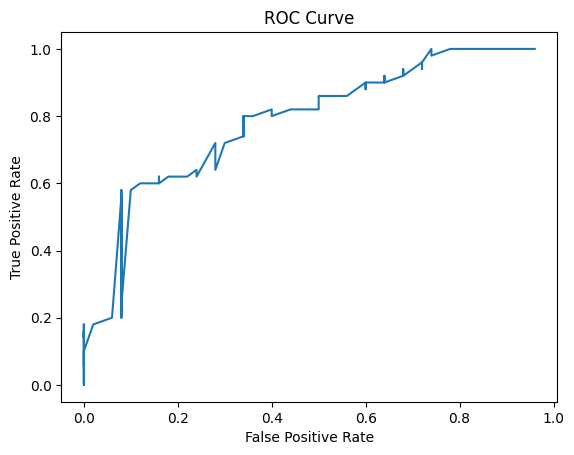

In [29]:
from eval.auroc import get_auroc

auroc = get_auroc(
    ood_detector,
    id_test_data,
    ood_data,
)

THIS IS SO SUS i think it needs to be debugged...

In [30]:
print("AUROC:", auroc)



AUROC: 0.7471999526023865
